## PRODUCTOS INMOBILIARIOS

A continuación se ejemplifica cómo consumir un conjunto de avisos de oferta inmobiliaria publicados en [properaty](https://blog.properati.com.ar/properati-data-informacion-abierta-y-actualizada-sobre-el-mercado-inmobiliario-2/). A su vez, cómo es el procesamiento de esta información para obetener distintos valores de referencia por producto inmobiliario. Estos puntos son los que se agruparán a nivel `Polygon`.

In [1]:
from REM.properaty_data import *
from REM.datasources import *
import matplotlib.pyplot as plt

### Descarga data desde Properaty-BigQuery

Para realizar la consulta, debemos indicar las fechas de inicio/fin de publicación y un `bbox` donde filtrar coordernadas geogŕaficas de la publicación.

In [ ]:
bbox = get_bbox_sur()
query_sur = get_query(bbox, sd='2021-01-01',ed='2022-08-14')
client = get_client()

In [ ]:
oferta_residencial = query_properati(client=client, query=query_sur)

In [ ]:
len(oferta_residencial)

In [ ]:
oferta_residencial['surface_total'].isna().value_counts()

In [ ]:
oferta_residencial.columns

In [ ]:
oferta_residencial.to_csv('../data/oferta_residencial_properaty.csv')

### Resultados

Se convierten las coordenadas geográficas a `Point` para evaluar el resultado de la consulta.

In [2]:
mascara = comunas(idx=[4,8])
propiedades = read_local_properati(path='../data/oferta_residencial_properaty.csv')
propiedades.start_date = pd.to_datetime(propiedades.start_date)
parcelas = caba_parcelas(source_idx=1)
parcelas_sur = build_study_area(parcelas, mascara)

Reading parcels from local dir ...


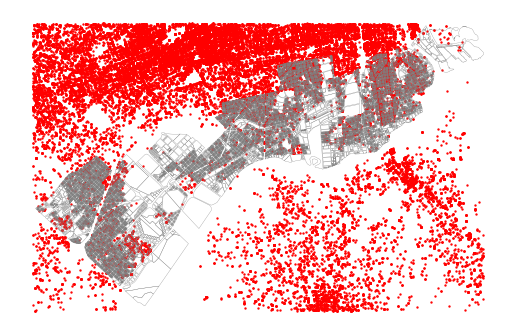

In [3]:
# Oferta dentro del bounding box
f, ax= plt.subplots()
parcelas_sur.geometry.boundary.plot(ax=ax, linewidth=0.2, edgecolor='gray')
propiedades.plot(ax=ax, color='red', markersize=0.5)
ax.set_axis_off();

In [4]:
propiedades_target = properaty_observed_prices(propiedades, parcelas_sur, property_type='demolicion')

Cantidad de avisos informan superficie:
***************************************
True     2634
False    2346
Name: surface_total, dtype: int64
Tipo de oferta: Terreno


`properaty_observed_prices` hace una serie de operaciones importantes. Primero, filtra el tipo de oferta. Después ajusta los precios por inflación para contar con el valor más actual. Por último, ajusta valores de superficies ofertadas y devuelve dos estimaciones de USD/m2 (imputando/no imputando la superficie mediana a las propiedades en las que no se informó ese atributo). Queda abierta la posibilidad de implementación de algún módulo que recupere información de superficies faltantes.

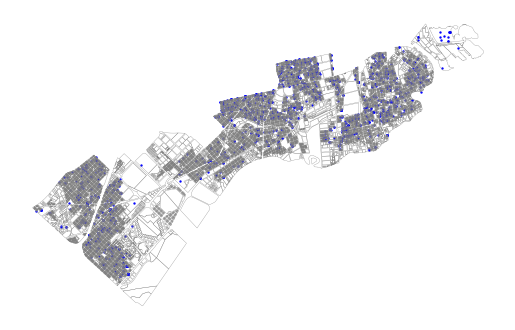

In [5]:
# como "demolicion" se agrupan PH,Casas y Lotes. El agrupamiento puede ser ajustado a necesidad.
f, ax= plt.subplots()
parcelas_sur.geometry.boundary.plot(ax=ax, linewidth=0.2, edgecolor='gray')
propiedades_target.plot(ax=ax, color='blue', markersize=0.5)
ax.set_axis_off();